In [20]:
import os
import random
import numpy as np
from roboflow import Roboflow
from PIL import Image
from helpers1 import plot

import skimage
import skimage.io
import selective_search

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from tqdm import tqdm
%matplotlib inline

In [16]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torchvision.models as models
import torchvision.transforms as transforms

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# rf = Roboflow(api_key="iOJNkzHKPzOLoZ0dIkM9")
# project = rf.workspace("aerial-person-detection").project("aerial-person-detection")
# version = project.version(3)
# dataset = version.download("darknet")

loading Roboflow workspace...
loading Roboflow project...


KeyboardInterrupt: 

In [3]:
sample_size = 20
count = 0
img_sample = []
labels_sample = []
for direntry in os.scandir("./data/train/images/"):
    if random.randint(0, 1) == 0:
        continue
    img_sample.append(direntry.path)
    labels_sample.append(direntry.path.replace("images", "labels"))
    count += 1
    if count >= sample_size:
        print("reached sample_size")
        break

reached sample_size


Произвожу selective_search для сэмпла из трейн датасета

In [4]:
from multiprocessing import Process, Manager
from for_selective_search import proceed_selective_search

if __name__ == "__main__":
    manager = Manager()
    dict_of_all = manager.dict()

    processes = [Process(target=proceed_selective_search, args=(img_sample[0:5], 1, dict_of_all)),
                 Process(target=proceed_selective_search, args=(img_sample[5:10], 2, dict_of_all)),
                 Process(target=proceed_selective_search, args=(img_sample[10:15], 3, dict_of_all)),
                 Process(target=proceed_selective_search, args=(img_sample[15:20], 4, dict_of_all))]

    for p in processes:
        p.start()
        
    for p in processes:
        p.join()
        
    print(dict(dict_of_all))


Process 3 has started execution
Process 2 has started execution
Process 4 has started execution
Process 1 has started execution


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels a

Process 2 has ended execution


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
Process Process-4:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/yanyshev_dima/Documents/Projects/AI Masters/Year Project/point3/src.py", line 16, in proceed_selective_search
    boxes = selective_search.selective_search(img, mode='single', random_sort=False)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

KeyboardInterrupt: 

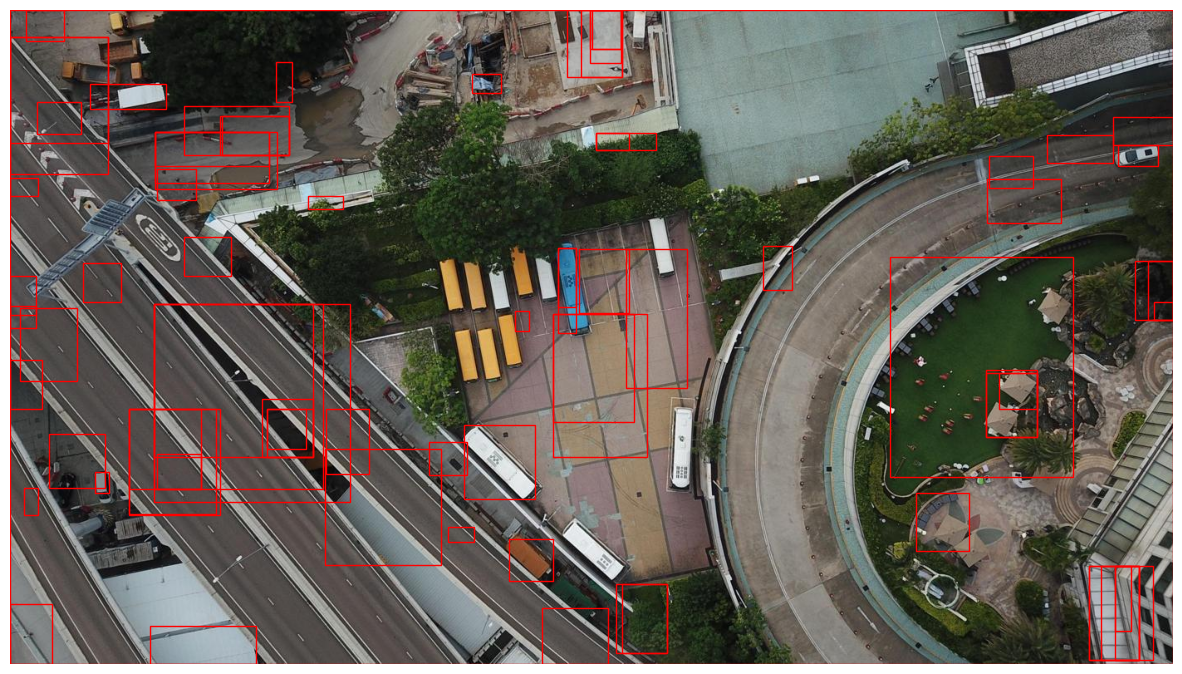

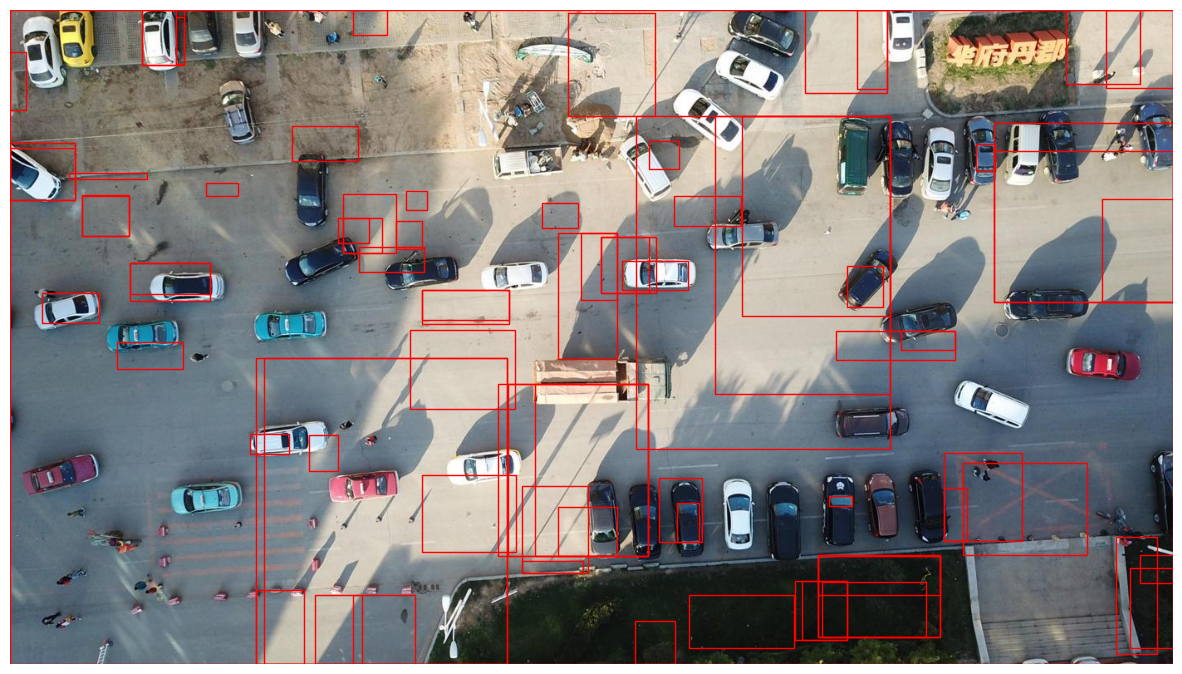

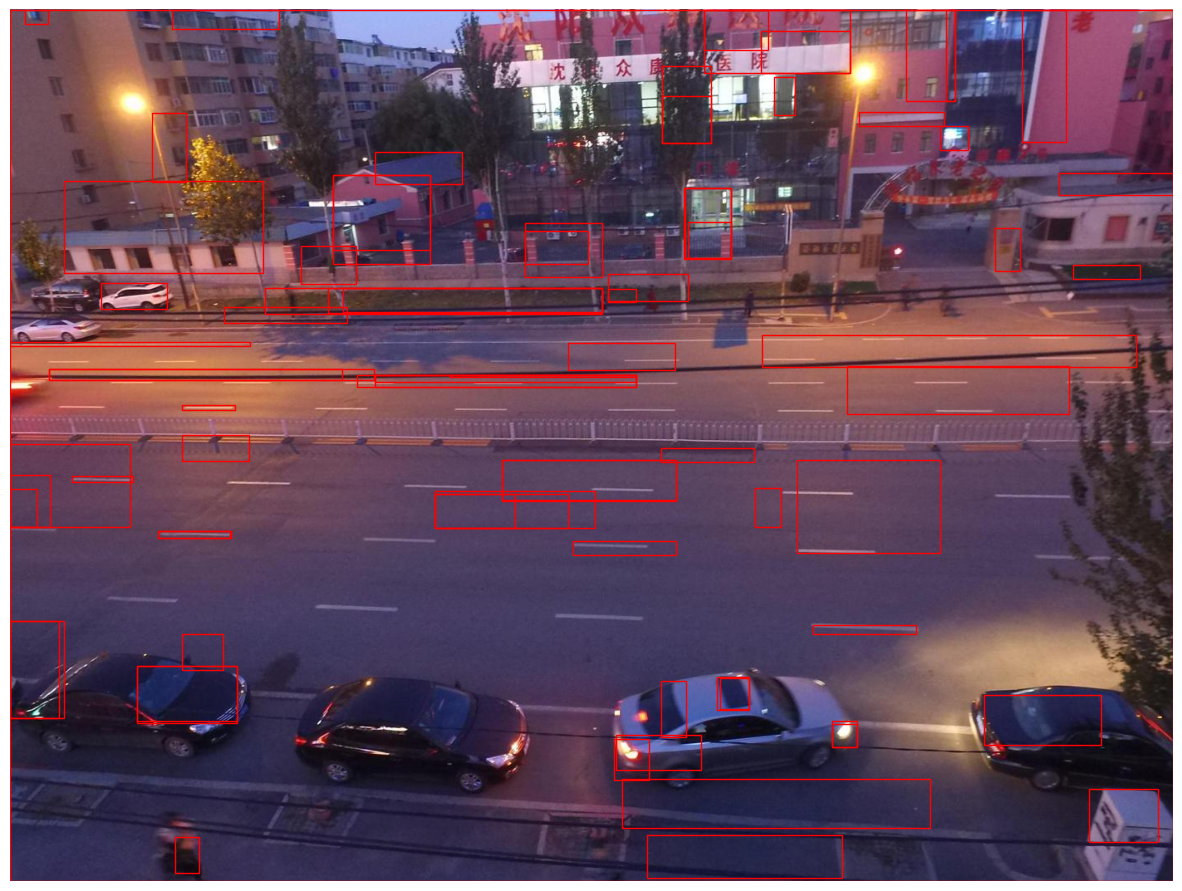

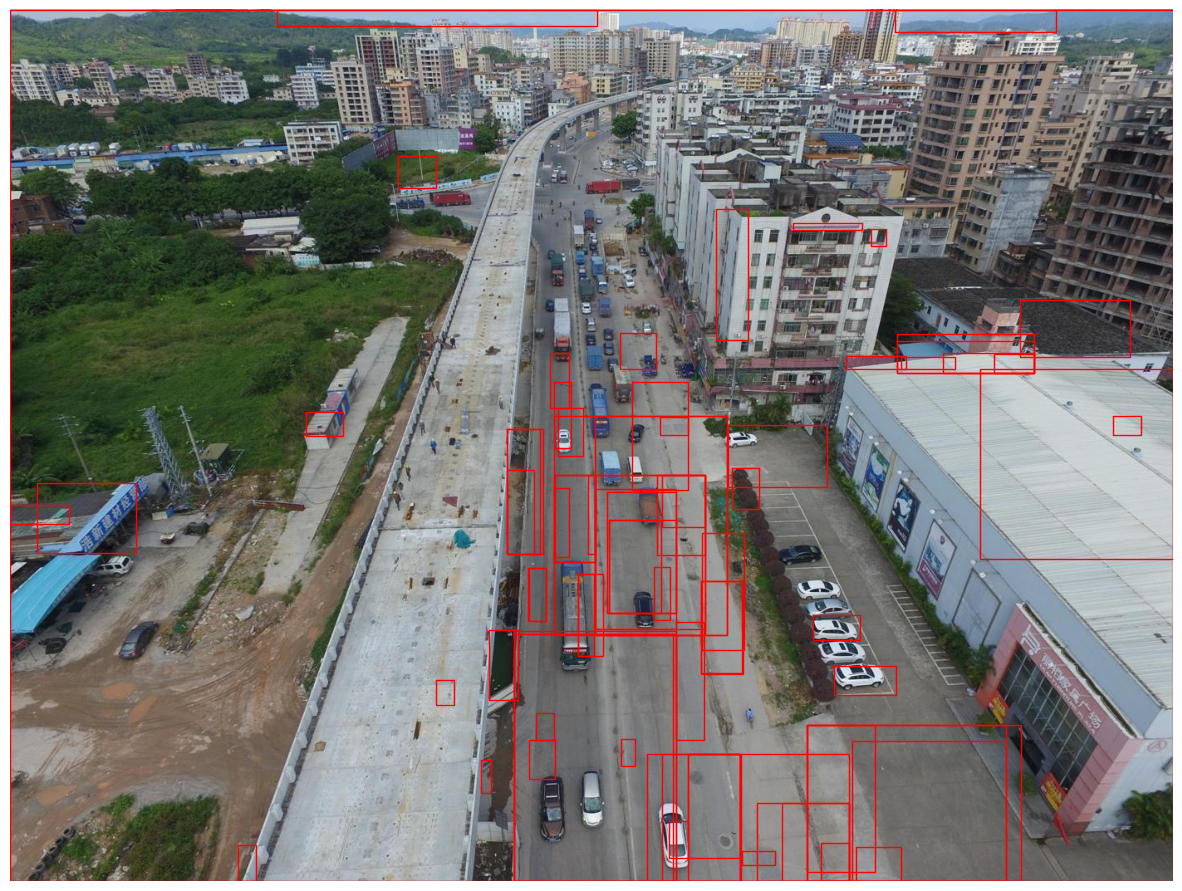

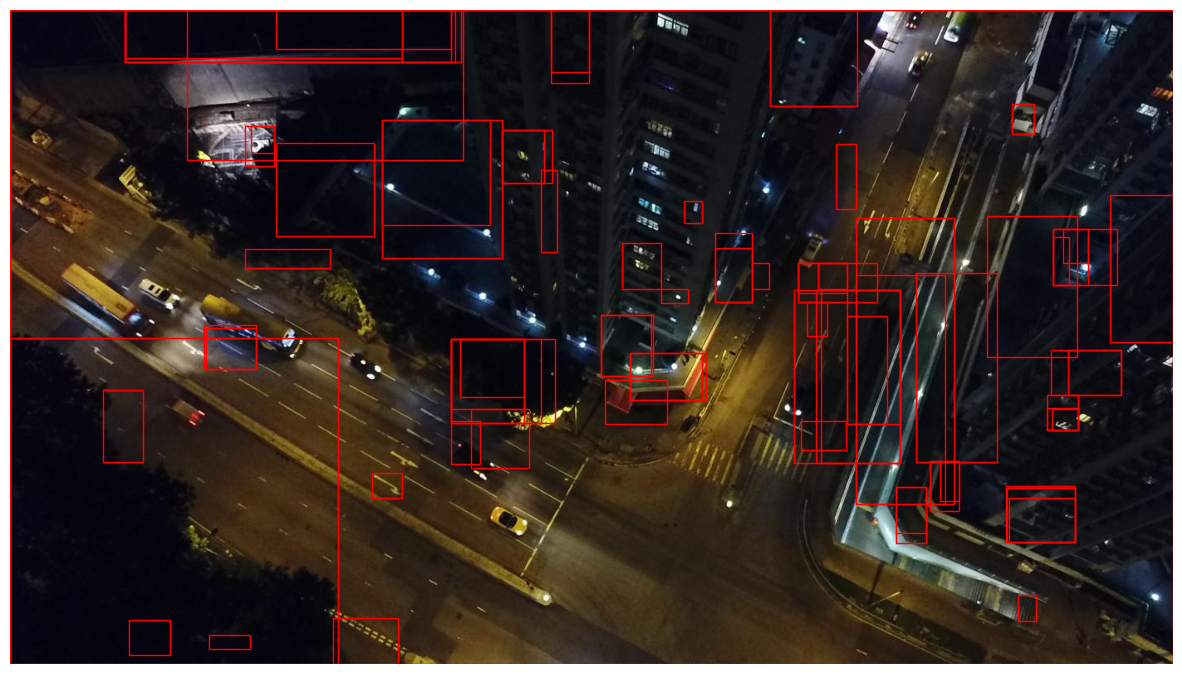

In [15]:
for image in [*dict_of_all[2].keys()]:
    img = Image.open(rf"{image}")
    
    fig, ax = plt.subplots(figsize=(15, 20))
    ax.imshow(img)
    for x1, y1, x2, y2 in dict_of_all[2][image]:
        bbox = mpatches.Rectangle(
            (x1, y1), (x2-x1), (y2-y1), fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(bbox)

    plt.axis('off')
    plt.show()

Selective Search отрабатывает не очень

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Доступное устройство: {device}")

resnet = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
resnet = resnet.to(device)
resnet.eval()

Доступное устройство: cpu


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /Users/yanyshev_dima/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:08<00:00, 11.5MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 